# 10. MNIST 손글씨 인식

In [63]:
import tensorflow as tf
import numpy as np
import os
import cv2
from PIL import Image
import matplotlib.pylab as plt

## 데이터 준비

In [64]:
# MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 전처리
x_train = x_train/255.0
x_test = x_test/255.0

## 모델 구성 및 학습

In [65]:
# 모델 구성
model = tf.keras.models.Sequential([
    # 28 X 28 pixel의 손글씨 데이터를 1차원 벡터 데이터로 변형(Flatten)
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 학습
model.fit(x_train, y_train, epochs=20, verbose=1)

# 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\n정확도 : ', test_acc)

Epoch 1/20
1875/1875 [==============================] - 38s 19ms/step - loss: 0.2018 - accuracy: 0.9393
Epoch 2/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0953 - accuracy: 0.9719
Epoch 3/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0682 - accuracy: 0.9795
Epoch 4/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0579 - accuracy: 0.9823
Epoch 5/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0437 - accuracy: 0.9870
Epoch 6/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0425 - accuracy: 0.9876
Epoch 7/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0358 - accuracy: 0.9892
Epoch 8/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0306 - accuracy: 0.9909
Epoch 9/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0298 - accuracy: 0.9912
Epoch 10/20
1875/1875 [==============================] - 32s 17m

## 손글씨 이미지 불러오기
MNIST 디렉토리 내에 저장한 손글씨 이미지를 로드

In [66]:
# 불러올 이미지들을 저장할 리스트
img = []

# 이미지들의 파일명들을 저장할 리스트
imageNames = []

# 이미지 불러오기
for i, imageName in enumerate(os.listdir('MNIST/')):
    if imageName != '.DS_Store':
        # 불러올 이미지의 경로를 변수에 저장
        path = 'MNIST/' + imageName

        # 이미지 불러오기
        img.append(cv2.imread(path, cv2.IMREAD_GRAYSCALE))

        # 불러온 이미지의 파일명을 리스트에 저장
        imageNames.append(imageName)

for i in imageNames:
    print(i)

6.jpeg
7.jpeg
4.jpeg
3.png


## 이미지 Resize
28 X 28 Pixel에 맞게 조정

In [67]:
for i, image in enumerate(img):
    img[i] = cv2.resize(image, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)

## 이미지 출력

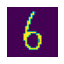

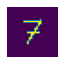

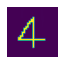

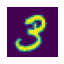

In [41]:
for i, img in enumerate(img):
    plt.figure(figsize=(30, 30))
    plt.subplot(1, len(img), i+1)
    plt.axis('off')
    plt.imshow(img[:, :])

## 이미지 Reshape

In [68]:
for i, image in enumerate(img):
    img[i] = image.reshape((-1, 28, 28))

## 이미지 Shape 확인

In [69]:
for i in img:
    print(i.shape)

(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)


## 예측 결과 출력

In [70]:
for i in img:
    for arr in model.predict(i):
        print(arr)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [71]:
for imgIndex, i in enumerate(img):
    print('정답 : ' + imageNames[imgIndex], end = '\t')
    for arr in model.predict(i):
        for j, num in enumerate(arr):
            if int(num) == 1:
                print('예측값 : %d' % j)

정답 : 6.jpeg	예측값 : 6
정답 : 7.jpeg	예측값 : 7
정답 : 4.jpeg	예측값 : 4
정답 : 3.png	예측값 : 3
